<a href="https://colab.research.google.com/github/omkar123katare/Normality_test/blob/main/Normality_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***WHY?***

**Which machine algorithms require data scaling/normalization?**

All algorithms that are distance based require scaling. This includes all curve fitting algorithms (linear/non-linear regressions), logistic regression, KNN, SVM, Neural Networks, clustering algorithms like k-means clustering etc.

Algorithms that are used for matrix factorization, decomposition or dimensionality reduction like PCA, SVD, Factorization Machines etc also require normalization.

Algorithms that do not require normalization/scaling are the ones that rely on rules. They would not be affected by any monotonic transformations of the variables. Scaling is a monotonic transformation - the relative order of smaller to larger value in a variable is maintained post the scaling. Examples of algorithms in this category are all the tree based algorithms - CART, Random Forests, Gradient Boosted Decision Trees etc. These algorithms utilize rules (series of inequalities) and do not require normalization.

Also, Algorithms that rely on distributions of the variables, like Naive Bayes also do not need scaling.

In [1]:
import pandas as pd
import numpy as nl
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
marketing_df=pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/marketing_cva_f.csv')

In [3]:
marketing_df.head()

,Customer,State,CLV,Coverage,Income,loc_type,monthly_premium,months_last_claim,Months_Since_Policy_Inception,Total_Claim_Amount,Vehicle_Class,avg_vehicle_age
0,BU79786,Washington,2763.519279,Basic,56274,Suburban,69,32,5,384.811147,Two-Door Car,40.696695
1,AI49188,Nevada,12887.431650,Premium,48767,Suburban,108,18,38,566.472247,Two-Door Car,48.755298
2,HB64268,Washington,2813.692575,Basic,43836,Rural,73,12,44,138.130879,Four-Door Car,70.394474
3,OC83172,Oregon,8256.297800,Basic,62902,Rural,69,14,94,159.383042,Two-Door Car,53.460212
4,XZ87318,Oregon,5380.898636,Basic,55350,Suburban,67,0,13,321.600000,Four-Door Car,32.811507


Transaformations can be applied to convert non-normal data into normal data

In [4]:
marketing_df.describe()

,CLV,Income,monthly_premium,months_last_claim,Months_Since_Policy_Inception,Total_Claim_Amount,avg_vehicle_age
count,6817.000000,6817.000000,6817.000000,6817.000000,6817.000000,6817.000000,6817.000000
mean,8130.229340,50456.580461,92.963034,15.046941,47.832624,377.840789,50.126257
std,6949.067972,24305.956566,34.615160,10.064762,27.895350,252.648952,9.919767
min,2119.894333,10037.000000,61.000000,0.000000,0.000000,0.099007,11.875974
25%,4090.750678,28432.000000,68.000000,6.000000,24.000000,210.100003,43.449925
50%,5810.630529,48081.000000,83.000000,14.000000,48.000000,340.800000,50.100924
75%,9075.768214,70187.000000,109.000000,23.000000,71.000000,498.612632,56.877234
max,83325.381190,99981.000000,297.000000,35.000000,99.000000,2893.239678,83.387485


##**Checking for avg_vehicle_age column**

**Is this column normally distributed?**

***Method1 :***

avg_vehicle_age is a continuoud variable. From describe method, we can see that mean of thais column is 50.12 and median of this column is 50.10 . Both mean and median are aproximately same, hence we can conclude that this column is normally distributed.

***Method2 :***

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


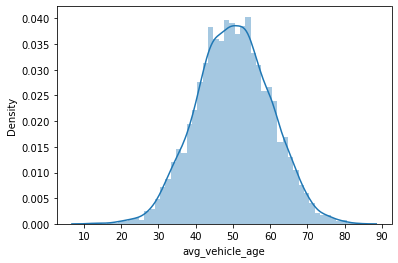

In [5]:
sns.distplot(marketing_df['avg_vehicle_age'],hist=True)

***Method3 :***

q-q (Quntile-Quantile plot):

1. This is a probability plot. This plot is used for graphically comparing two probability distributions by plotting the qualtiles of the underlying data.

2. Red line is the reference line. We are plotting different quantile values with blue dots based on our data. If the quantiles based on our continuous column fall on reference line, our column is considered to be normally distributed.

3. If the points deviate from the reference line, the column is not normally distributed.

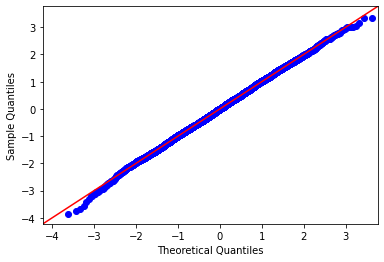

In [10]:
plot=sm.qqplot(marketing_df['avg_vehicle_age'], line="45",fit=True)

***Method4 :***

Using boxplot. If the boxplot is distributed symmetrically around the mean value, we can say that the numerical column follows a normal distribution.

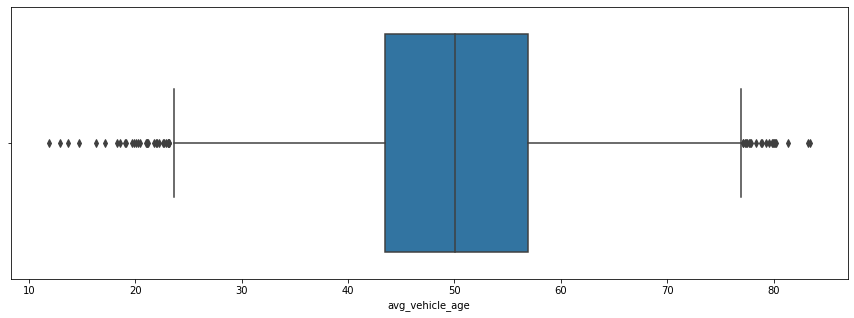

In [11]:
plt.figure(figsize=(15,5))
sns.boxplot(data=marketing_df,x='avg_vehicle_age')

***Method 5: Statistical Test method to verify if the column is truly normally distributed or not.***

***Test 1 : Normal Test***

**Null Hypothesis :** sample data came from a normal distribution (p>0.05)


**Alternate Hypothesis :**sample data did not come form a normal distribution (p<0.05)

In [12]:
chi2,p=stats.normaltest(marketing_df['avg_vehicle_age'])

In [13]:
print(p)

0.5931827357362212


p value is way more than 0.05

(p>0.05)

Hence, Null hypothesis is true.

Sample data came from a normal distribution.

***Test 2 : Andeson Normality Test***

This test checks if sample data came form a specific distribution. Here we are checking if data came from normal distribution.

**Null Hypothesis :** sample data came from the selected distribution (p>0.05)


**Alternate Hypothesis :**sample data did not come form the selected distribution (p<0.05)

In [15]:
stats.anderson(marketing_df['avg_vehicle_age'],dist='norm')

AndersonResult(statistic=0.38327277704684093, critical_values=array([0.576, 0.656, 0.787, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

For 5% significance level, 

0.787 > 0.38 Hence null hypothesis is true.

###***How do you Transaform a non normal distribution of dependent variable into a normal distribution?***
***Using a boxcox transformation***

**But why?**

Some statisticl techniques need your data to be normally sistributed in order to apply them. 

Some ML algorithms also required your numerical column to be normally distributed in order to apply them.

So, in case the continuous column is not normally distributed, we do boxcox transaformation to transaform the column into normal distribution. **and then use those statistical techniques and machine learning algorithms.**

In [22]:
transformed,Lambda=stats.boxcox(marketing_df['avg_vehicle_age'])

In [26]:
# transaformed directly gives transformed column
# lambda value suggests required tranformation

In [25]:
Lambda

1.0401663194162196

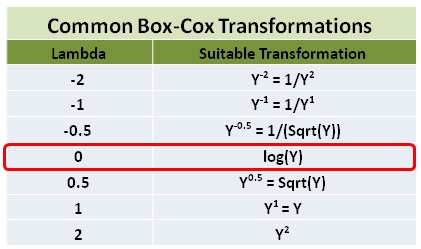

In [23]:
transformed

array([44.44390147, 53.83105644, 79.32549941, ..., 73.30261186,
       52.95181951, 49.62516631])

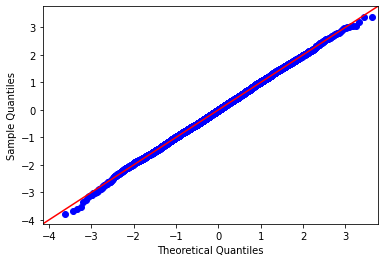

In [24]:
plot=sm.qqplot(transformed, line="45",fit=True)

##**Checking for income column**

***Method 1:***

In [27]:
marketing_df.describe()

,CLV,Income,monthly_premium,months_last_claim,Months_Since_Policy_Inception,Total_Claim_Amount,avg_vehicle_age
count,6817.000000,6817.000000,6817.000000,6817.000000,6817.000000,6817.000000,6817.000000
mean,8130.229340,50456.580461,92.963034,15.046941,47.832624,377.840789,50.126257
std,6949.067972,24305.956566,34.615160,10.064762,27.895350,252.648952,9.919767
min,2119.894333,10037.000000,61.000000,0.000000,0.000000,0.099007,11.875974
25%,4090.750678,28432.000000,68.000000,6.000000,24.000000,210.100003,43.449925
50%,5810.630529,48081.000000,83.000000,14.000000,48.000000,340.800000,50.100924
75%,9075.768214,70187.000000,109.000000,23.000000,71.000000,498.612632,56.877234
max,83325.381190,99981.000000,297.000000,35.000000,99.000000,2893.239678,83.387485


Mean Income - 50456

Median income - 48081

From this we can say that this is a positively skewed column.

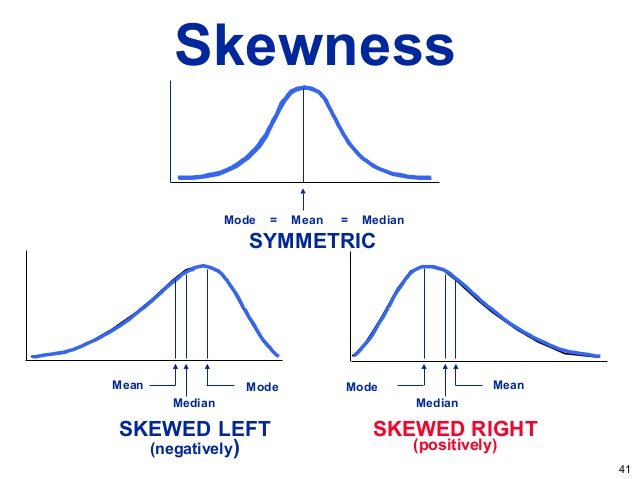

***Method 2:***

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


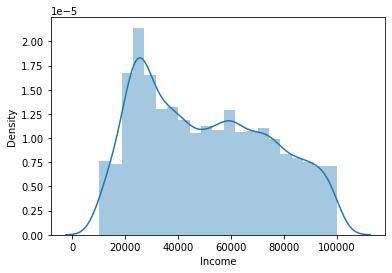

In [45]:
sns.distplot(marketing_df['Income'],hist=True)

***Method3 :***

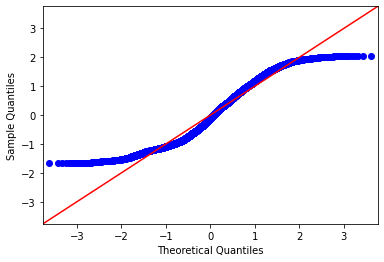

In [29]:
plot=sm.qqplot(marketing_df['Income'], line="45",fit=True)

quantiles are not on reference line, hence column is not normally distributed.

***Method 4:***

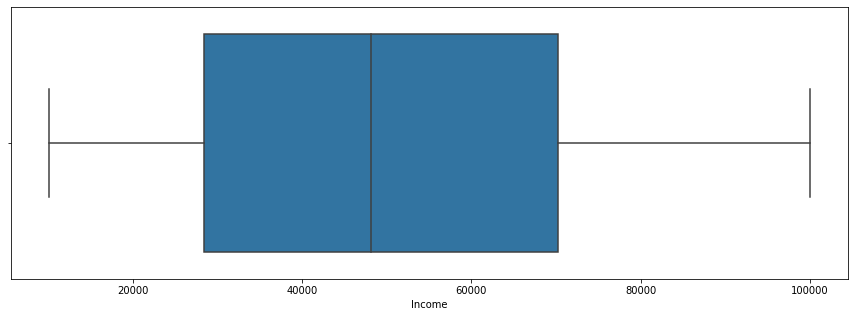

In [31]:
plt.figure(figsize=(15,5))
sns.boxplot(data=marketing_df,x='Income')

Values are not symmetrically spread out around mean, hence not normally distributed.


***Method 5: Statistical Test method to verify if the column is truly normally distributed or not.***

***Test 1 :Normal Test***

**Null Hypothesis :** sample data came from a normal distribution (p>0.05)


**Alternate Hypothesis :**sample data did not come form a normal distribution (p<0.05)

In [34]:
chi2,p=stats.normaltest(marketing_df['Income'])

In [35]:
print(p)

0.0


P value is zero. hence, p<0.05

Hence, we accept alternate hypothesis.
Sample data did not come from a normal distribution. 

***Test 2 : Andeson Normality Test***

This test checks if sample data came form a specific distribution. Here we are checking if data came from normal distribution.

**Null Hypothesis :** sample data came from the selected distribution (p>0.05)


**Alternate Hypothesis :**sample data did not come form the selected distribution (p<0.05)

In [36]:
stats.anderson(marketing_df['Income'],dist='norm')

AndersonResult(statistic=94.67577589420944, critical_values=array([0.576, 0.656, 0.787, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

For alpha value 0.05,

0.0787 !>94.67

Hence alternate hypothesis is true.

Sample data did not come from the selected distribution.

###***How do you Transaform a non normal distribution of dependent variable into a normal distribution?***
***Using a boxcox transformation***

In [37]:
transformed,Lambda=stats.boxcox(marketing_df['Income'])

In [38]:
Lambda

0.44437538279540056

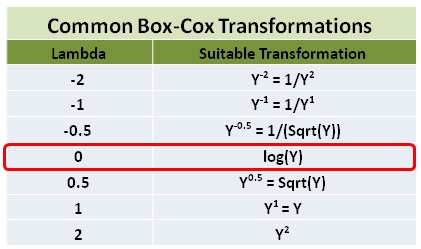

So, preferred transformation is square root of the whole column

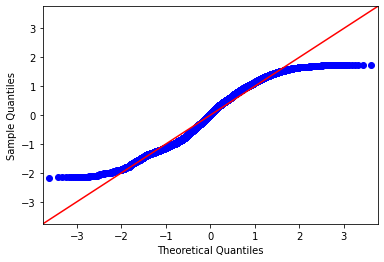

In [40]:
plot=sm.qqplot(transformed, line="45",fit=True)

In [46]:
transformed,Lambda=stats.boxcox(transformed)

In [47]:
print(f"new lambda is {Lambda}")

new lambda is 0.9991233642916201


Now, no transformation is required